In [71]:
import pandas as pd
import numpy as np

In [72]:
data = pd.read_csv("Data.csv")

In [73]:
data
graph = pd.DataFrame()
graph["seconds"] = data["seconds"]
graph["effect"] = data["effect"]

In [74]:
val = {"value": []}
for effect in graph["effect"]:
    if effect == "high":
        val["value"].append(1)
    if effect == "HIGH":
        val["value"].append(2)
    if effect == "low":
        val["value"].append(-1)
graph["value"] = pd.DataFrame(val)

In [75]:
graph["cumu_val"] = graph["value"].rolling(window= 10**4, min_periods=1).sum()
graph

,seconds,effect,value,cumu_val
0,5,high,1,1.0
1,21,high,1,2.0
2,33,HIGH,2,4.0
3,58,high,1,5.0
4,75,high,1,6.0
5,96,HIGH,2,8.0
6,98,HIGH,2,10.0
7,120,high,1,11.0
8,199,high,1,12.0
9,221,HIGH,2,14.0


In [104]:
def graphing(factor_rate):
    final_graph = pd.DataFrame()
    final_graph["second"] = np.linspace(0, 445, 446)
    final_graph["values"] = np.zeros(446)
    final_graph["values"][0] = 1
    factor = 1
    j = 0
    for i in range(final_graph.shape[0]):
        if final_graph["second"][i] == graph["seconds"][j]:
            final_graph["values"][i] = final_graph["values"][i-1] + graph["value"][j]
            j += 1
            factor = 1
        else:
            if i != 0:
                final_graph["values"][i] = final_graph["values"][i-1] - np.exp(-1*factor)
                factor += factor_rate
    final_graph.plot(x = "second")

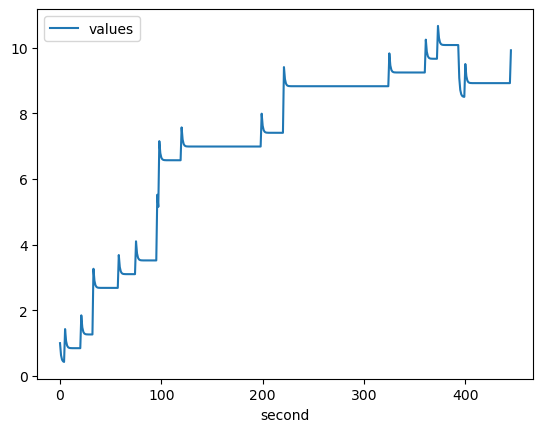

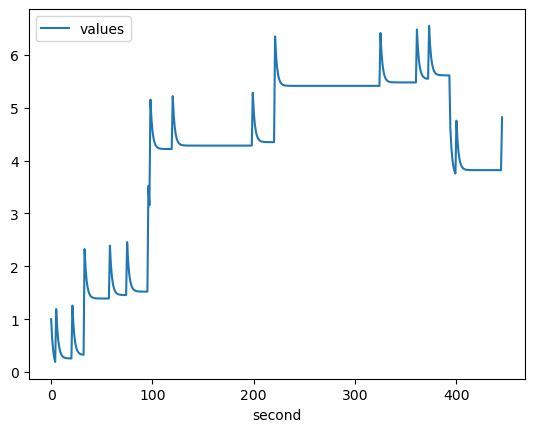

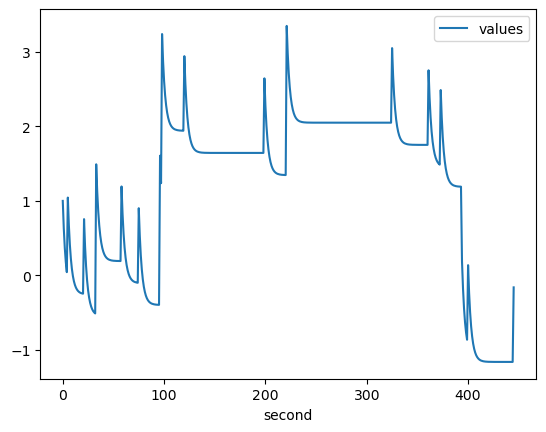

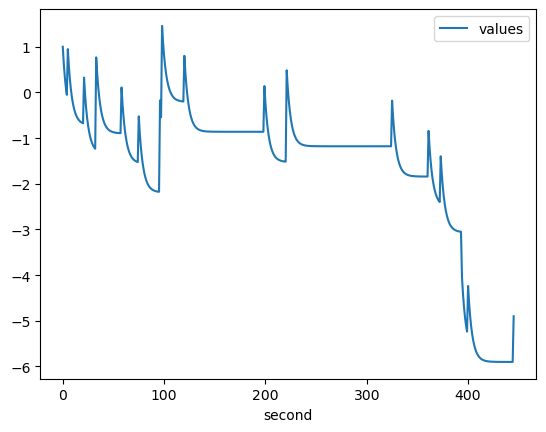

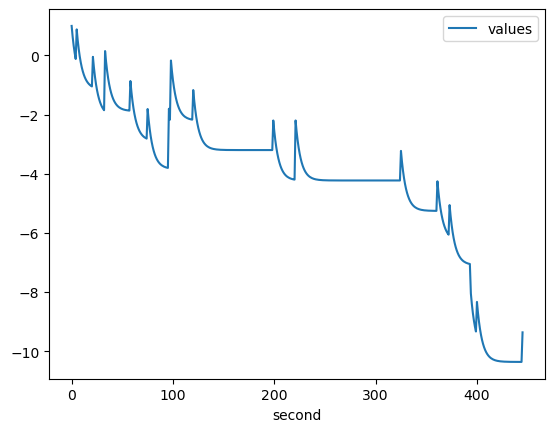

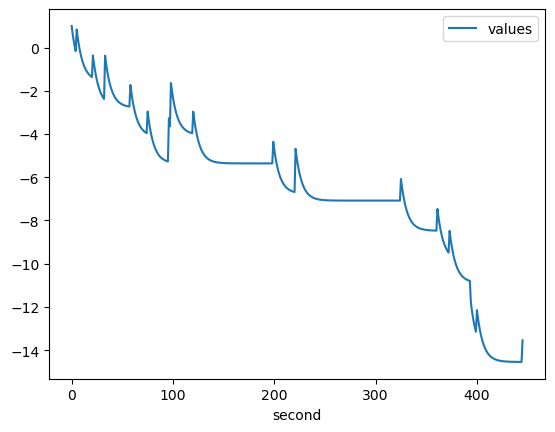

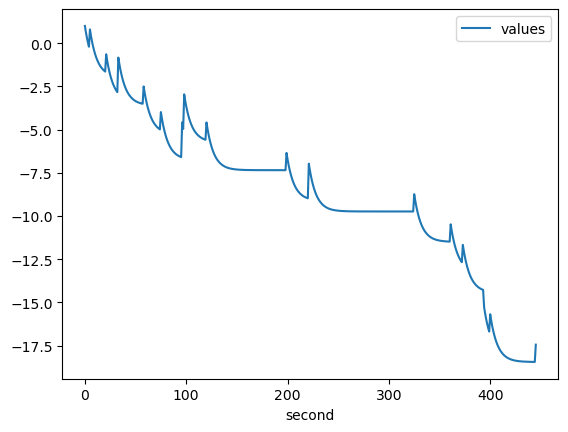

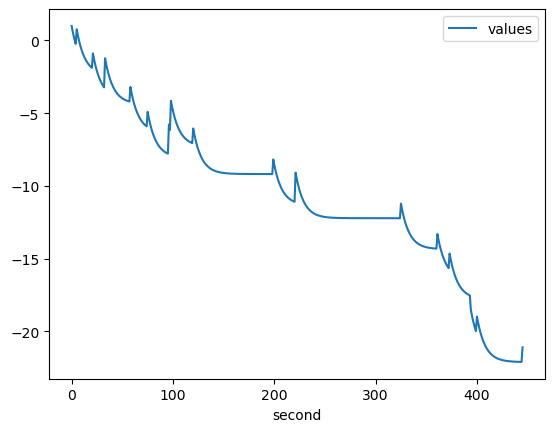

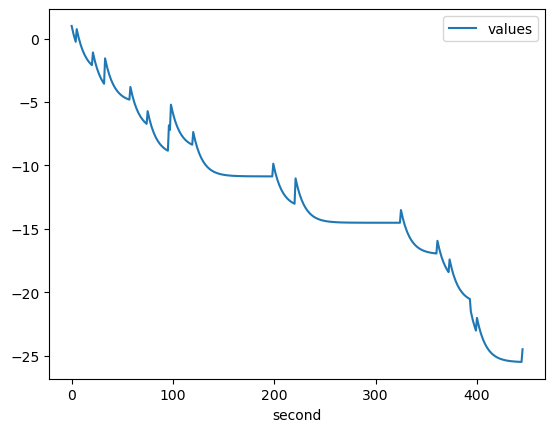

In [106]:
for i in range(1, 10):
    graphing(1/i)